# Milestone 1 - Independent Project

## Author - ZhuoyuPeng



## Instructions

1. Generate a clear statement problem and provide the location for the datasetyou use.
2. Provide a clear solution to the problem for a non-technical audience.
3. Visually explore the data to generate insight and include summary statistics.
4. Use an appropriate statistical analysis method.
5. Prepare the data via cleaning, normalization, encoding, et cetera.
6. Generate and evaluate a working model (hypothesis, linear, or time series).
7. Draw direct inferences and conclusions from model results.
8. Use professional coding standards and techniques including:

    - explanatory markdown text
    - proper code comments
    - functions to minimize redundant code
    - minimize hard-coded variables

### Note
Please use the <a class="icon-pdf" title="Independent Project Rubric" href="https://library.startlearninglabs.uw.edu/DATASCI410/Handouts/DATASCI%20410%20Independent%20Project%20Rubric.pdf" target="_blank" rel="noopener">Rubric</a> as a general guide for your project.

# Abstract
## Problem
How different features of houses affect the house price in King county?

## Conclusion
1. Waterfront price is more expensive than non-waterfront house.


2. For houses whose zipcode beyond 98100 are smaller and older, but the price is relatively the same to those houses that were built in recent decades with larger living areas. Both location and living areas have major contributions to house pricing.


3. In the same (or nearby) neighborhood, larger living areas results in higher price.

In [77]:
# Location of dataset
# I download the the dataset from web page, it's located in my local environment 
#it also can be found :https://www.kaggle.com/harlfoxem/housesalesprediction

In [78]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
#reading file using pandas
df = pd.read_csv('kc_house_data.csv')
#set to display 2 decimal place
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [80]:
#show the first five rows data
df.head()
#Table is too wide. I modify that in the next cell.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


Table is too wide, I modify the column names and some columns below

But from this table, from the first five row of data, a few observations:
    1. Doesn't have categorical variables. (Some are categorical meanings, but no need to encode.
    2. id column doesn't have valuable information when predicting price, which can be removed 

    

In [81]:
#create a copy of original dataset
df2 = df.copy()
#shirnk the table by dropping useless columns and and renaming columns
#id and date might be as useful as the rest of the data, so drop them
df2 = df2.drop(columns=['id','date'])
#rename columns
df2.columns = ['price', 'beR', 'baR', 's_liv', 's_lot', 'flrs',
       'wf', 'v', 'c', 'g', 's_ab',
       's_bs', 'y_bul', 'y_re', 'zip', 'lat', 'long',
       's_liv15', 's_lot15']
df2.head()

,price,beR,baR,s_liv,s_lot,flrs,wf,v,c,g,s_ab,s_bs,y_bul,y_re,zip,lat,long,s_liv15,s_lot15
0,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


By renaming the columns, tables can be viewed easily.


Now, take a look at statistics of the dataset

In [82]:
#save description in a new dataframe
df_des = df2.describe()

In [83]:
#View the first 10 columns
df_des.iloc[:,0:10]

,price,beR,baR,s_liv,s_lot,flrs,wf,v,c,g
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00


From the first 10 columns, a few observations:
1. There is an appearent outliers in number of bedroom, which has the maximum to be 33, way higher than the mean.
2. Another outliers are in sqrt_living and sqrt_lot.


In [84]:
#view columns for the rest
df_des.iloc[:,10:]

,s_ab,s_bs,y_bul,y_re,zip,lat,long,s_liv15,s_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


From lastnine columns, a few observations:
1. Looking at the lat and long, I found that observations are located closely.
2. Outliers: sqrt_basement, sqrt_above

In [85]:
df2.head()

,price,beR,baR,s_liv,s_lot,flrs,wf,v,c,g,s_ab,s_bs,y_bul,y_re,zip,lat,long,s_liv15,s_lot15
0,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


Finally, take a look at the dataset df2. 
Dataset df2 is ready for preliminary plotting.

### Ploting

First, I want to explore what year built and price of houses are more popular, which gives insights of the market.

Below, I use hexbin plot to show the relationship of year built and price.

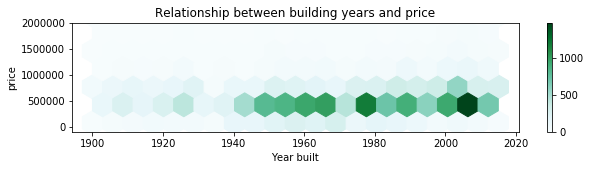

In [86]:
ax = plt.figure(figsize=(10, 2)).gca()
df2.plot.hexbin(x = 'y_bul', y = 'price', gridsize = 20,ax=ax)
ax.set_xlabel('Year built')
ax.set_ylim(-100000,2000000)
ax.set_title('Relationship between building years and price');


In hexbin plot, we can learn that:
1. Houses around and below 50,000 dollars are polpular in the market.
2. Newer houses are generally more popular in the market. (House built after 1940s)


We also need to take house remodeling into account.It would be interesting to know whether renovation would help increase the pricing of the house.

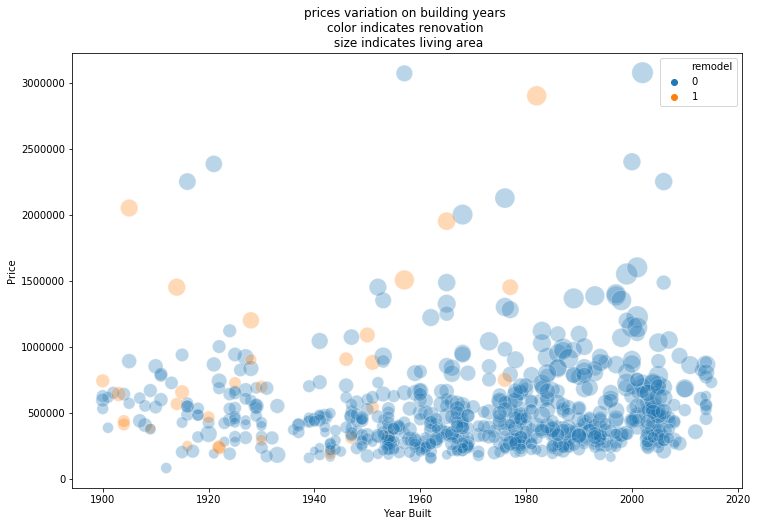

In [95]:
#group year built, year_remodel, and price via averaged values.
remodels = df2[['y_bul', 'y_re','price','s_liv15']]
#use count to indicate whether the house have been renovated, 1 stands for yes, 0 means no.
remodels.loc[:,'remodel'] = np.where(remodels['y_re'] != 0, 1, 0)

ax = plt.figure(figsize=(12, 8)).gca()
#only plotting the first 700 observations to avoid overplotting
sns.scatterplot(remodels['y_bul'][:700], remodels['price'][:700], hue=remodels['remodel'][:700],
                alpha =0.3, s=remodels['s_liv15']/10)
ax.set_xlabel('Year Built')
ax.set_ylabel('Price')
ax.set_title('prices variation on building years \n' +
            'color indicates renovation \n ' +
            'size indicates living area');

In this remodeling scatter plot, we can learn that:
1. It's hard to tell whether remodeling has impact on house pricing because there are other factors contribute to it.
2. Remodeling occures more commonly in old houses (built before 1960s)

Next step, I group year_built, we can see how price changes along with time, with the changes of living area.Prices and living areas are averaged.Also, I want to consider briefly location effect, so zipcodes are averaged. 

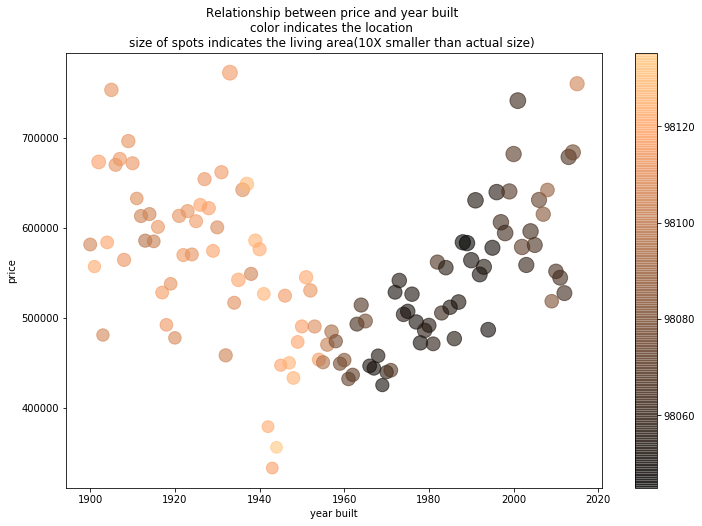

In [88]:
fig = plt.figure(figsize=(12,8))
year_zip = df2[['price','zip','y_bul','s_liv15']].groupby(['y_bul']).agg(np.mean)
f1=plt.scatter(year_zip.index, year_zip['price'], c=year_zip['zip'], 
               s = year_zip['s_liv15']/10, cmap='copper', alpha=0.6)
plt.colorbar(f1)
plt.xlabel('year built')
plt.ylabel('price')
plt.title('Relationship between price and year built \n' +
         'color indicates the location \n'+
         'size of spots indicates the living area(10X smaller than actual size) ');

In this scatter plot, we can see that:
1. It's quite surprising that price is not monotonically increased along with time. Due to currency inflation, I thought that price would be increased for the same house along with time. It turns out many factors could have impact on house pricing.

2. By introducing the location of a hourse to the figure, we found that houses that are built after 1960s are in regions 98100 and before. In this region, the newer the house is, the higher price it is. In the region of 98100 and beyond, houses are much older, but still yield high prices, suggesting that these areas have some other external factors that affect the price, like school district, or shopping center. 

3. Size of the spots are living areas of houses. It's hard to tell the difference in this figure though. (see next plot)

Next, I want to see how exact location affects house pricing, combined the effect of living area. I group the data using zipcode, and average out price and living area.

In [89]:
zipcode_group = df2[['zip', 'price', 's_liv15', 's_lot15', 'c']].groupby('zip').agg(np.median)

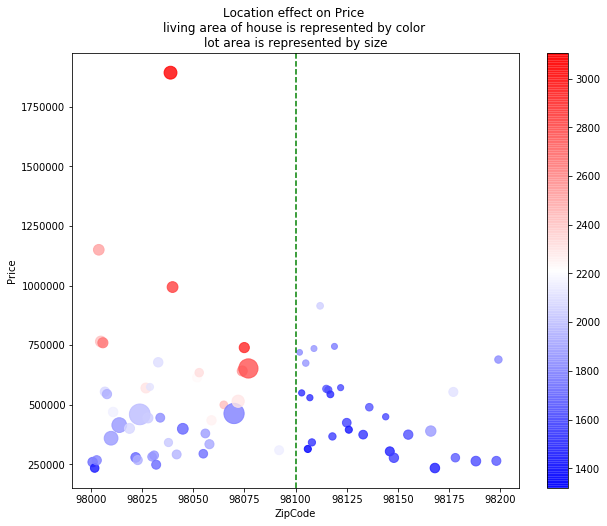

In [90]:
fig = plt.figure(figsize=(10,8))
im3=plt.scatter(zipcode_group.index, zipcode_group['price'], c =zipcode_group['s_liv15'], 
                    s = zipcode_group['s_lot15']/100 ,alpha=0.8, cmap='bwr')
plt.axvline(np.mean(zipcode_group.index)+ 23, color='green', linestyle ='--')
plt.colorbar(im3)
plt.xlabel('ZipCode')
plt.ylabel('Price')
plt.title('Location effect on Price \n' +
         'living area of house is represented by color \n' + 
         'lot area is represented by size');

Combined two scatter plots, we can learn that:
1. From scatter plot "Relationship between price and year built", we've learned that houses that built before 98100 regions are built after 1960s (approximately), and are more expensive. Combined with this scatter plot 'Location effect on Price', the first half of x-axis are new houses (after 1960s), the second half would be old houses. In this case, we can confirm that houses are built larger along with time (Spots are larger in the first half).

2. Combined theses two scatter plots, we can see that lands are more valuable in the zipcode 98100 and beyond. (Smaller and older houses, but they still yield similar prices compared to larger and newer and hourses) 

3. In general, in nearby neighborhood, larger houses (larger living areas) are more expensive (more reds and light blues in higher y-axis) 

4. Lot size is not linearly related to living size.


Another important factor contribute to house pricing is surrounding environment. 

Below, I plot the prices vs waterfront features and condictions of the house. 

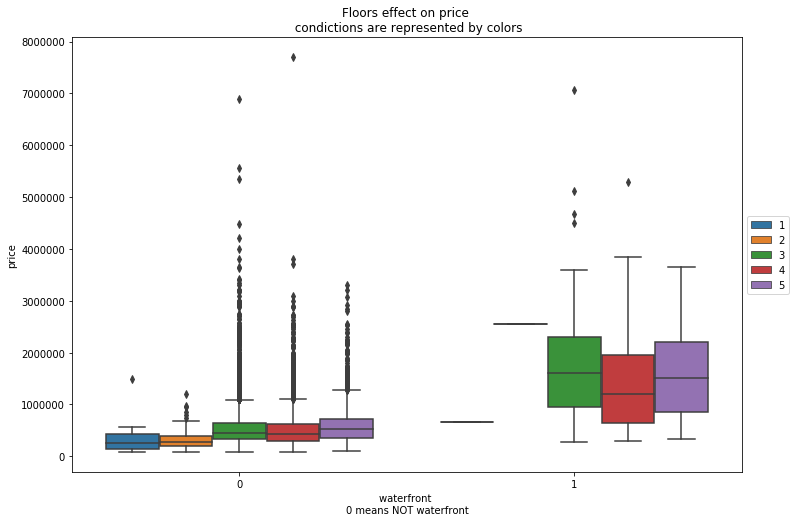

In [91]:
fig = plt.figure(figsize=(12,8))
im2 = sns.boxplot(df2['wf'], df2['price'], hue=df2['c'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('waterfront \n' +
           '0 means NOT waterfront')
plt.title('Floors effect on price \n '+
         'condictions are represented by colors');

In this box plot, we can see that:

1. When comparing non-waterfront and waterfront hourses at the same house condition (color),there's a significant difference on price. Waterfront house are more expensive than not-waterfront house. 
2. Within the non-waterfront observations, houses with better conditions yield higher prices. 
3. In the waterfront observations, there is only a few bad condition houses. Most of them are in a good condition. However, the price is not greatly impacted by condition.

Last but not least, I want to explore relationships bewteen year built, price, living areas and number of floors.

In [92]:
facet = df2[['price','s_liv15','y_bul','flrs','zip']].groupby('y_bul').agg(np.median)
facets = facet.reset_index()
#rename columns in detailed
facets.columns = ['year built','price','living area', 'num of floors','zip']

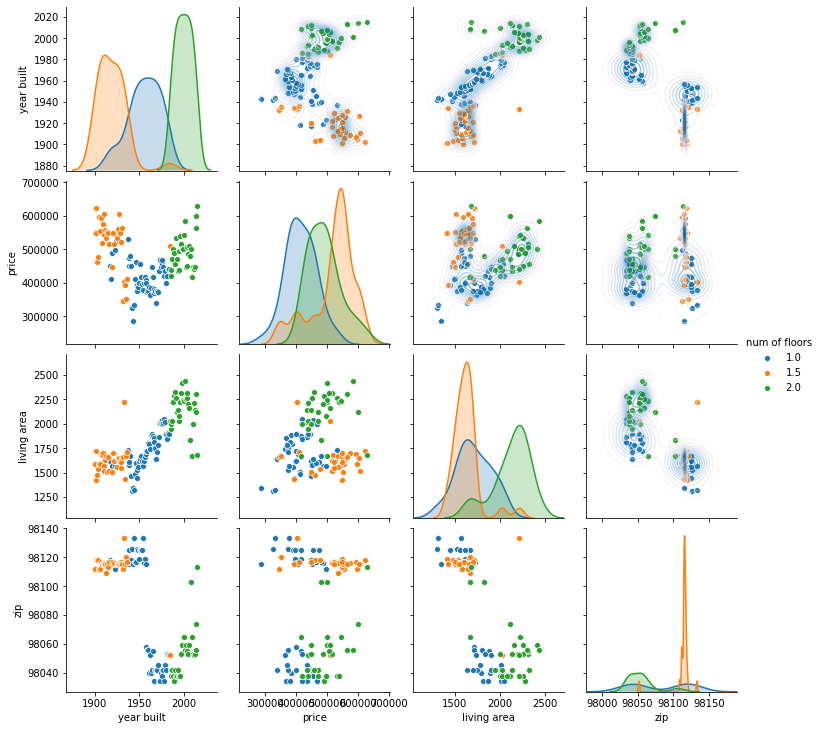

In [93]:
sns.pairplot(facets[['year built','price','living area','num of floors','zip']], 
             hue ='num of floors',
            diag_kind='kde').map_upper(sns.kdeplot, cmap='PuBu', alpha=0.4);

In the facet plot, we can learn that:

1. Living areas are getting larger and there are more floors built along with time. Larger houses with more floors are dominated in nowadays. (from figure living area vs year built)


2. Surprisingly, living areas and number of floors are not linearly related to price. Other factors contribute a lot. (from living areas vs price)


3. Another surprising observation is house that are built in the middle of 20th centuries have the lowest market price.(from figure price vs year built)


4. It's interesting that people like to build 1.5 floors in old days (1900-1950s), then transition to one floor, then two floors nowdays. (from figure living area vs year built)


5. There's no difference in price for different number of floors. 

Summary on how features affect house pricing:
    
1. Waterfront price is more expensive than non-waterfront house.
2. For houses whose zipcode beyond 98100 are smaller and older, but the price is relatively the same to those houses that were built in recent decades with larger living areas. Both location and living areas have major contributions to house pricing.
3. In the same (or nearby) neighborhood, larger living areas results in higher price.

